In [1]:
import torch
from predict import *
from bbox import *
from datagen import DataGenerator
from models import Yolov1_vgg16bn
from torch.utils.data import DataLoader

use_gpu = torch.cuda.is_available()

## Hyper-parameters


In [12]:
resume = False

train_data_path = 'hw2_train_val/train15000'
val_data_path = 'hw2_train_val/train15000'
train_data_num = 1500
validate_data_num = 1500
img_size = 448
S = 7
B = 2
C = 16

n_batch = 20

## Data

In [3]:
transform = transforms.Compose(
    [
        transforms.ToTensor()
    ]
)
# traing dataset loader
train_dataset = DataGenerator(
    parent_dir=train_data_path, 
    img_size=img_size, 
    S=S, B=B, C=C, 
    transform=transform, num = train_data_num, train = True
)
train_loader = DataLoader(train_dataset, batch_size = n_batch, shuffle = True, num_workers = 2)

# validation dataset loader
validation_dataset = DataGenerator(
    parent_dir = val_data_path, img_size = img_size,
    S = S, B=B, C = C, 
    transform=transform, num = validate_data_num, train = False
)
validation_loader = DataLoader(validation_dataset, batch_size = n_batch, shuffle = False, num_workers = 2)

 500  1000  1500  500  1000  1500 

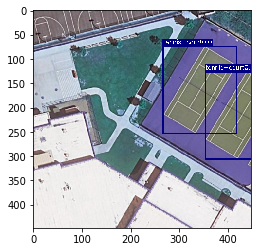

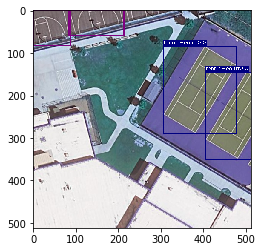

In [9]:
img_name, img, target = train_dataset.__getitem__(1266)

tar_boxes_xy, tar_boxes_cls = target_to_boxes_xy(target)

# vidualize training data
plt.figure(1)
visualize_bbox(img_name, tar_boxes_xy, tar_boxes_cls, np.zeros(len(tar_boxes_xy)))

plt.figure(2)
visualize_bbox_gt(img_name)

## Model

In [10]:
model = Yolov1_vgg16bn(pretrained = True)

if resume:
    print("====> Resumming from chechpoint...")
    checkpoint = torch.load('./checkpoint/ckpt.pth')

if use_gpu:
    model.cuda()

model.train()


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256, kernel_size=(3, 3)